In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housePrice.csv')

In [3]:
df.head(4)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [5]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [6]:
df.describe(include=object)

,Area,Address
count,3479,3456
unique,243,192
top,75,Punak
freq,111,161


In [7]:
import re

df['Address'].fillna(value=df['Address'].mode().iloc[0], inplace=True)
df['Area'] = df['Area'].map(lambda x: re.sub(',', '', x))
df['Area'] = df['Area'].astype(np.int64)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   int64  
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3479 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 146.2+ KB


In [9]:
df = df[df['Area'] < 3600]

C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area', ylabel='Density'>

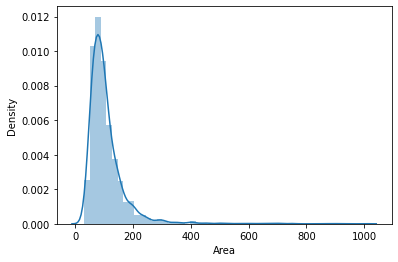

In [10]:
sns.distplot(df['Area'])

<AxesSubplot:ylabel='Area'>

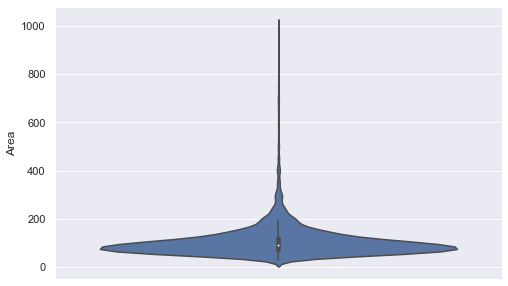

In [11]:
sns.set(rc={'figure.figsize':(8,5)})
sns.violinplot(y = df['Area'])

C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

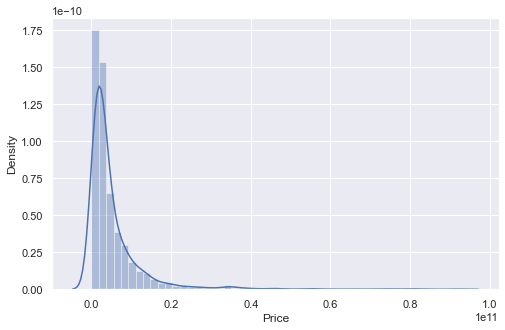

In [12]:
sns.distplot(df['Price'])

<AxesSubplot:>

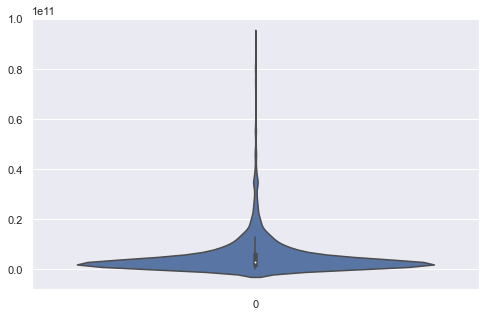

In [13]:
sns.violinplot(data=df['Price'])

In [14]:
price_mean = df.groupby('Address').agg({'Price': 'mean', 'Price(USD)' : 'mean'})
price_mean = price_mean.reset_index()
price_mean

,Address,Price,Price(USD)
0,Abazar,8.594130e+09,286471.013913
1,Abbasabad,3.230000e+09,107666.665000
2,Absard,4.233333e+09,141111.110000
3,Abuzar,1.528333e+09,50944.443333
4,Afsarieh,1.866667e+09,62222.221667
...,...,...,...
187,Yousef Abad,7.031974e+09,234399.123158
188,Zafar,1.317440e+10,439146.668000
189,Zaferanieh,2.357515e+10,785838.271481
190,Zargandeh,7.068000e+09,235600.000000


<AxesSubplot:xlabel='Area', ylabel='Price(USD)'>

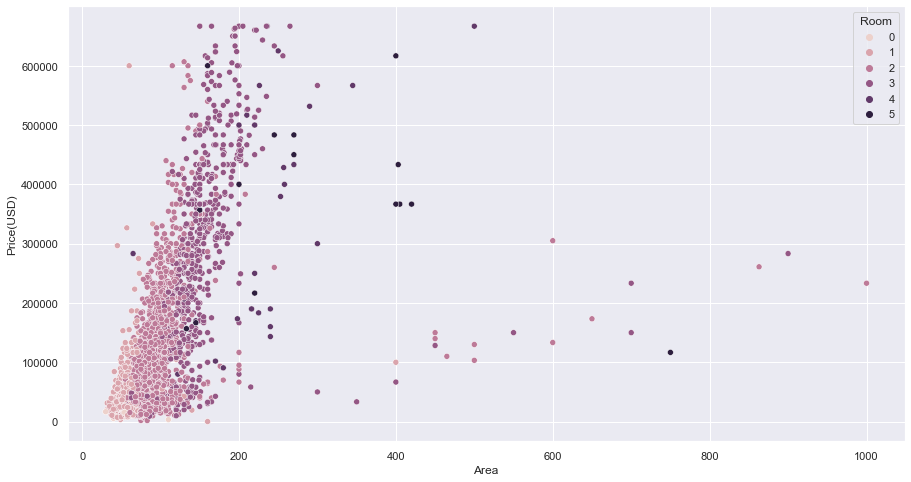

In [16]:
sns.set(rc={'figure.figsize':(15,8)})
sns.scatterplot(data=df[df['Price']<=20000000000], x='Area', y='Price(USD)', hue='Room')

<AxesSubplot:xlabel='Price', ylabel='Area'>

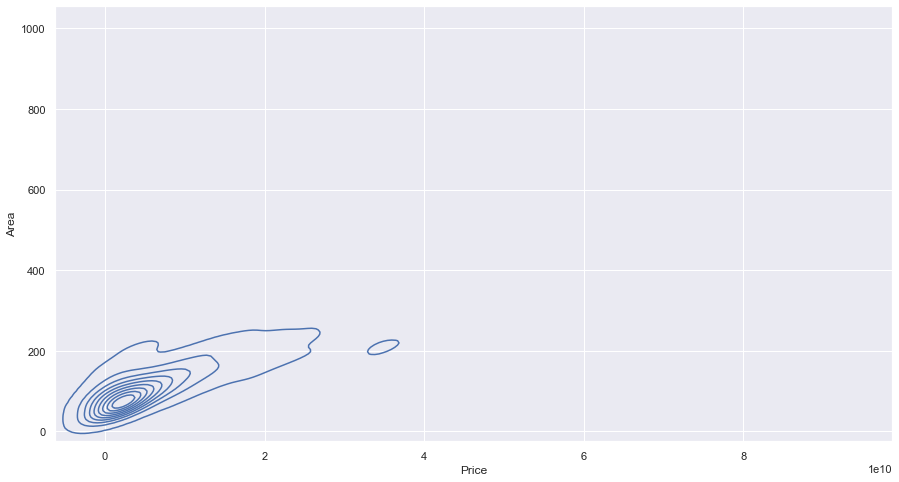

In [31]:
sns.kdeplot(x=df.Price, y=df.Area)

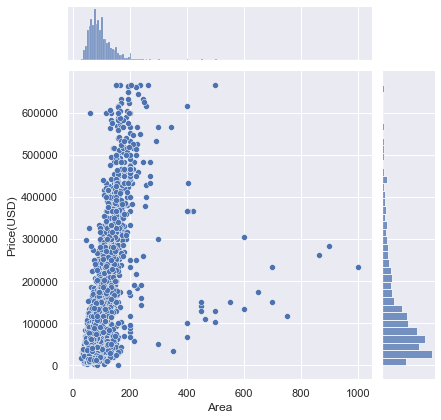

In [18]:
sns.set(rc={'figure.figsize':(15,8)})
sns.jointplot(data=df[df['Price']<=20000000000], y='Price(USD)', x='Area')

<AxesSubplot:ylabel='Area'>

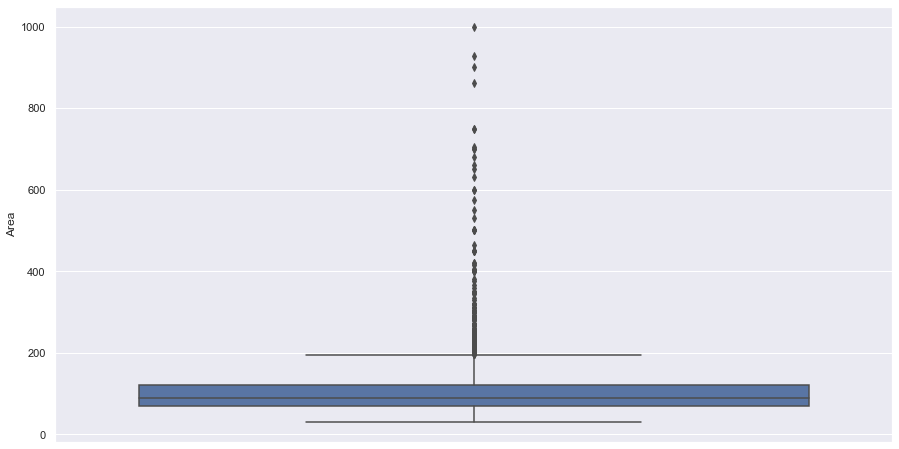

In [25]:
sns.boxplot(data=df, y='Area')

In [26]:
df.head(4)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33


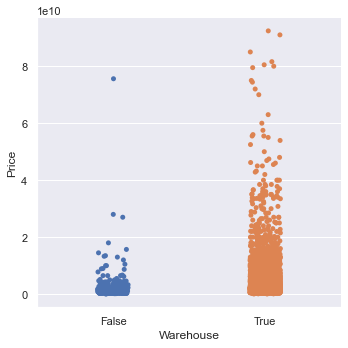

In [58]:
sns.catplot(data=df, x='Warehouse', y='Price')

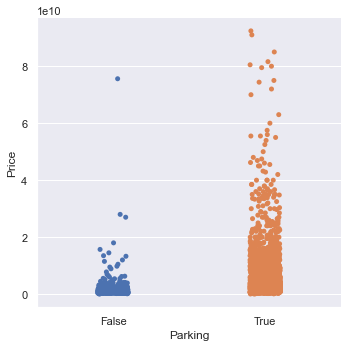

In [70]:
sns.catplot(data=df, x='Parking', y='Price')

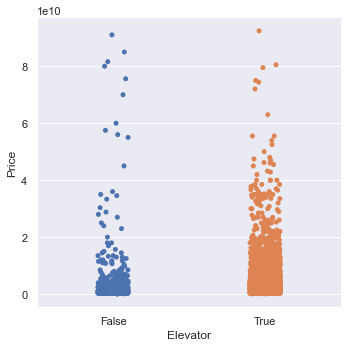

In [60]:
sns.catplot(data=df, x='Elevator', y='Price')

In [59]:
df.head(4)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33


<AxesSubplot:xlabel='Area', ylabel='Price'>

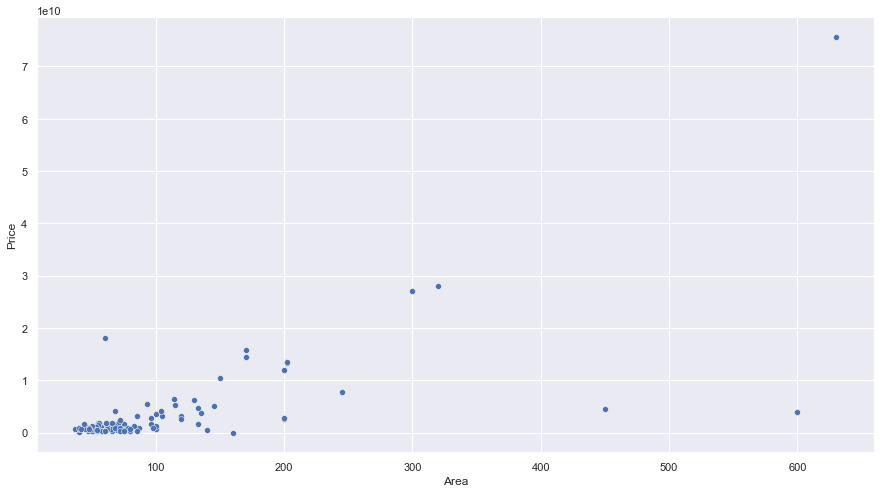

In [76]:
sns.scatterplot(data=df.loc[ (df['Parking']==False) & (df['Warehouse']==False) & (df['Elevator']==False) ],x='Area', y='Price')

<AxesSubplot:xlabel='Area', ylabel='Price'>

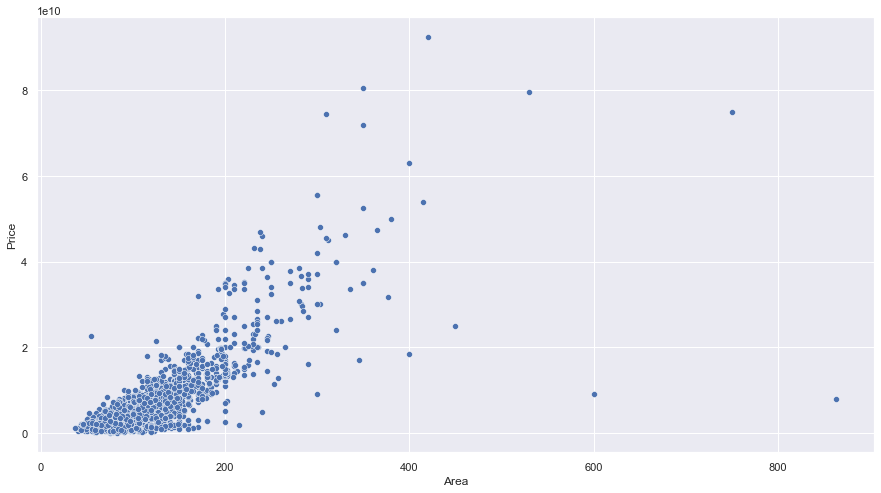

In [77]:
sns.scatterplot(data=df.loc[ (df['Parking']==True) & (df['Warehouse']==True) & (df['Elevator']==True) ],x='Area', y='Price')

<AxesSubplot:xlabel='Area', ylabel='Price'>

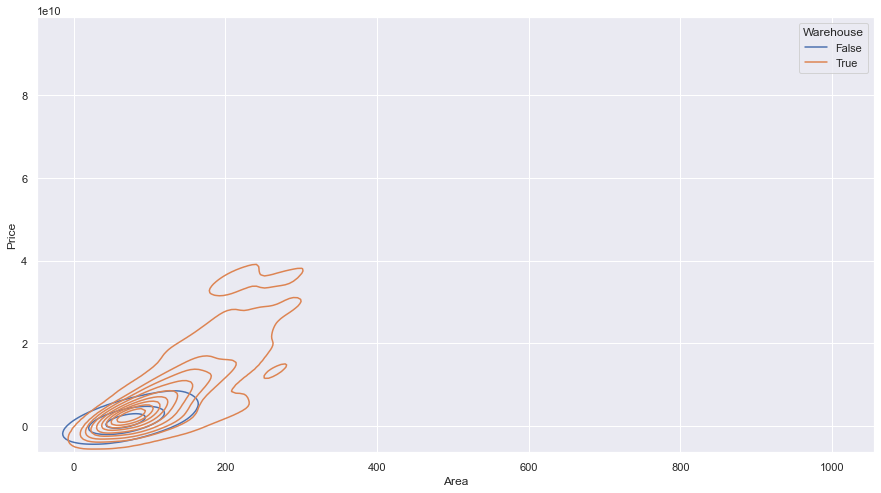

In [96]:
sns.kdeplot(data=df, x='Area', y='Price', hue='Warehouse')

<AxesSubplot:xlabel='Area', ylabel='Price'>

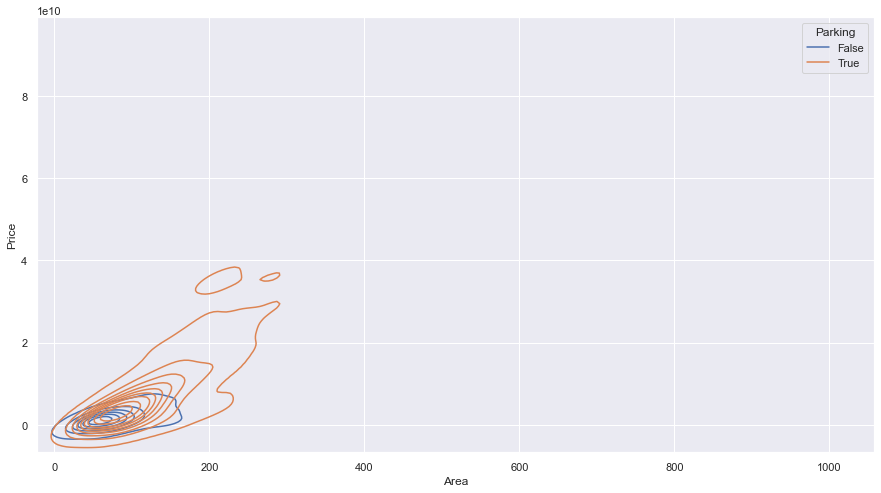

In [100]:
sns.kdeplot(data=df, x='Area', y='Price', hue='Parking')

<AxesSubplot:xlabel='Area', ylabel='Price'>

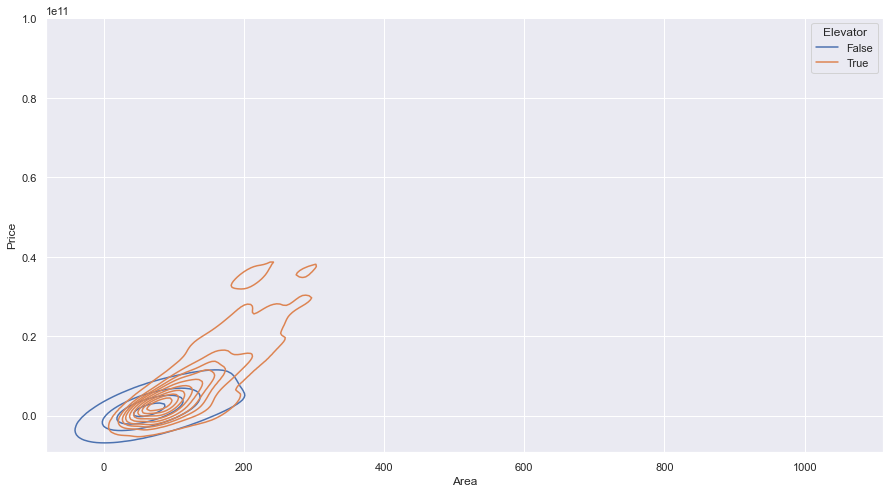

In [101]:
sns.kdeplot(data=df, x='Area', y='Price', hue='Elevator')